In [1]:
from zipfile import ZipFile 

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
import numpy as np
from PIL import ImageDraw, ImageFont

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!


In [2]:
def findface(image):
    
    arrayedimg = np.array(image)
    img =cv.cvtColor(arrayedimg,cv.COLOR_BGR2GRAY)
    faces_array = []
    faces = face_cascade.detectMultiScale(img,1.3,5)
    for rec in faces:
        justface = image.crop((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]))
        justface.thumbnail((110,110))
        faces_array.append(justface)
    return faces_array

In [3]:
def contact_sheetmaker(images):
    w = 110*5
    h = ((len(images)//5)+1)*110
    contact_sheet = Image.new('RGB',(w,h))
    x=0
    y=0
    for i in images:
        contact_sheet.paste(i,(x,y))
        if(x==440):
            x=0
            y=y+110
        else:
            x=x+110
    return contact_sheet

In [6]:
image_list = []
with ZipFile("readonly/images.zip", 'r') as myfile: 
    myfile.extractall()
    for i in myfile.infolist():
        
        mydict = {}
        filename = i.filename
        mydict['filename'] = filename
        
        img = Image.open(filename)
        img = img.convert('RGB')
        
      
        mydict['text'] = pytesseract.image_to_string(img)
        
        faces = findface(img)
        mydict['numofimages'] = len(faces)
        
 
        if len(faces)>0:
            mydict['contact_sheet'] = contact_sheetmaker(faces)

        image_list.append(mydict)

In [8]:
def search(name):
    for i in image_list:
        if name in i['text'] and i['numofimages']>0:
            print('Results found in file {}'.format(i['filename']))
            display(i['contact_sheet'])
        elif name in i['text'] and i['numofimages']==0:
            print('But there were no faces in that file')
            

Results found in file a-0.png


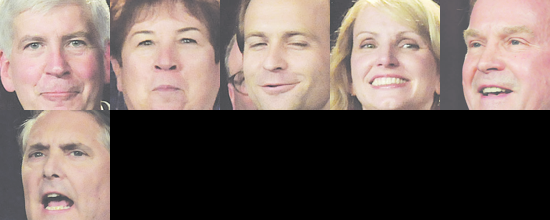

Results found in file a-3.png


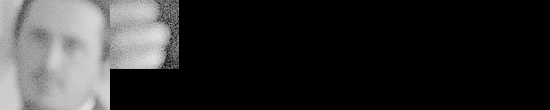

In [9]:
search('Christopher')

Results found in file a-0.png


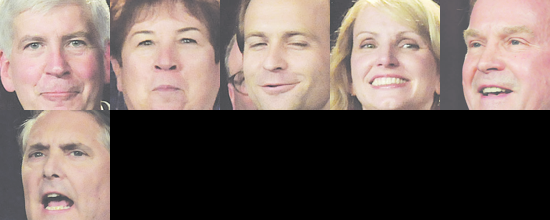

Results found in file a-1.png


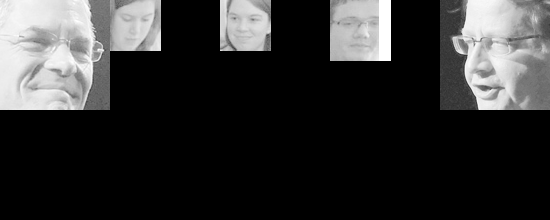

But there were no faces in that file
Results found in file a-13.png


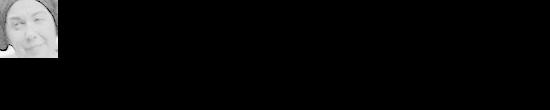

Results found in file a-2.png


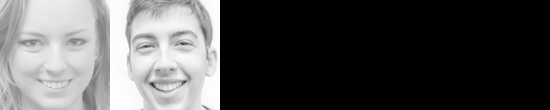

Results found in file a-3.png


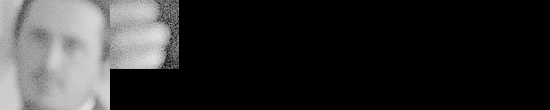

But there were no faces in that file


In [10]:
search('Mark')